## 1. Problem Definition
> “what sorts of people were more likely to survive the sinking of the Titanic?” using passenger data (ie: name, age, gender, socio-economic class, etc)

## 2. Data
> https://www.kaggle.com/competitions/titanic/data
> we have train.csv and test.csv
> In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

> Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

> The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

> Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

> Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

## 3. Evaluation
> Evaluation metric to use: Accuracy, Precision, Recall, f1_score, ROC and AUC curve

## 4. Features
> we have structured data
> with train.csv with a total of 891 passengers of features and labels
> with test.csv with a total of 418 passengers
> submission file to have one feature : PassengerId and one label : Survived

## 5. Modelling
> models to use: 1. Linear SVC
                 2. KNeighborsClassifier
                 3. RandomForestClassifier

                

## EDA (Exploratory Data Analysis)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip '/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/titanic.zip' -d '/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/'

In [ ]:
# Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/train.csv')
train[:30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

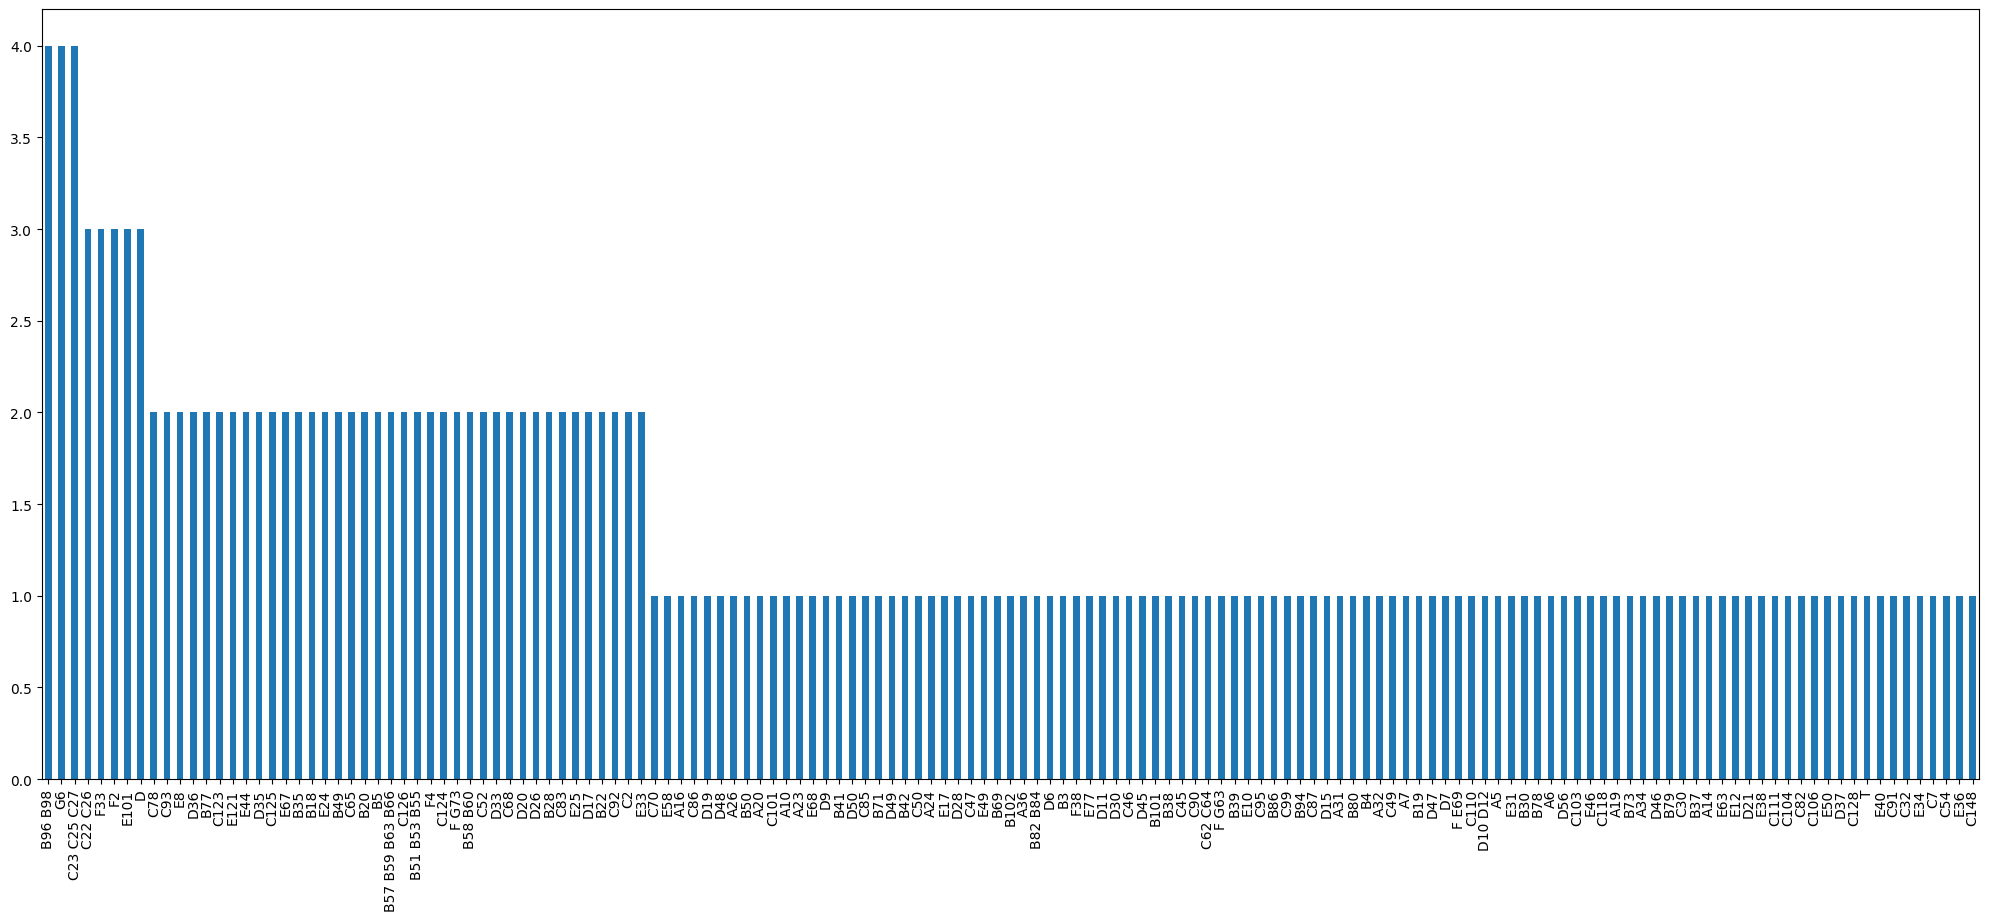

In [ ]:
train.Cabin.value_counts().plot.bar(figsize=(25,10))

## 2. Preprocessing

### 1. Convert strings/sobjects into categories
### 2. Convert categorical data to numbers
### 3. fill the numerical na values with median

In [ ]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for label, content in train.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Name
Sex
Ticket
Cabin
Embarked


In [ ]:
for label,content in train.items():
  if pd.api.types.is_string_dtype(content):
    train[label] = content.astype('category').cat.as_ordered()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [ ]:
for label, content in train.items():
  if pd.api.types.is_categorical_dtype(content):
    print (label)

Name
Sex
Ticket
Cabin
Embarked


In [ ]:
for label, content in train.items():
  if pd.api.types.is_categorical_dtype(content):
    train[label+'_is_missing'] = pd.isnull(content)
    train[label] = pd.Categorical(content).codes +1

In [ ]:
train.isnull().sum()

PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                    0
Embarked                 0
Name_is_missing          0
Sex_is_missing           0
Ticket_is_missing        0
Cabin_is_missing         0
Embarked_is_missing      0
dtype: int64

In [ ]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,0,3,109,2,22.0,1,0,524,7.2500,0,3,False,False,False,True,False
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False
2,3,1,3,354,1,26.0,0,0,670,7.9250,0,3,False,False,False,True,False
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False
4,5,0,3,16,2,35.0,0,0,473,8.0500,0,3,False,False,False,True,False


In [ ]:
for label, content in train.items():
  if pd.isnull(content).sum():
    if pd.api.types.is_numeric_dtype(content):
      train[label+'_is_missing'] = pd.isnull(content)
      train[label] = content.fillna(content.median())

In [ ]:
train.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Name_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
Age_is_missing         0
dtype: int64

In [ ]:
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing,Age_is_missing
0,1,0,3,109,2,22.0,1,0,524,7.2500,0,3,False,False,False,True,False,False
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False,False
2,3,1,3,354,1,26.0,0,0,670,7.9250,0,3,False,False,False,True,False,False
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False,False
4,5,0,3,16,2,35.0,0,0,473,8.0500,0,3,False,False,False,True,False,False


### B. Split the data into train and validation

In [ ]:
X = train.drop('Survived', axis=1)
y = train.Survived

In [ ]:
X[:2]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing,Age_is_missing
0,1,3,109,2,22.0,1,0,524,7.2500,0,3,False,False,False,True,False,False
1,2,1,191,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False,False


In [ ]:
y[:2]

0    0
1    1
Name: Survived, dtype: int64

In [ ]:
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(712, 179, 712, 179)

### C. Build a call-back function that evaluates the model performance

In [ ]:
models = {'LinearSVC': LinearSVC(),
          'LogisticRegression':LogisticRegression(),
         'KNeighorsClassifier': KNeighborsClassifier(),
         'RandomForestClassifier': RandomForestClassifier()}

def fit_and_score(model, X_train, X_valid ,y_train, y_valid):
  """
  """
  np.random.seed(42)
  model_scores ={}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_valid, y_valid)
  return model_scores

### D. Check the score of the model

In [ ]:
model_scores = fit_and_score(model = models,
                             X_train = X_train,
                             X_valid = X_valid,
                             y_train = y_train,
                             y_valid = y_valid)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.6256983240223464,
 'LogisticRegression': 0.7150837988826816,
 'KNeighorsClassifier': 0.659217877094972,
 'RandomForestClassifier': 0.8268156424581006}

## Hyperparameter Tuning

### 1. RandomizedSearchCV

In [ ]:
RandomForestClassifier().get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
 LinearSVC().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# set up parameter distribution of the estimator/model that will be combined with the parameters of the evaluation metric (randomizedseachcv or gridsearchcv)
parameter_distribution = {'C' : np.logspace(-4,4,20),
                          "tol": [1e-3, 1e-4, 1e-5],
                          "penalty":['l1','12'],
                          'solver': ['liblinear'],
                          'max_iter': [1500]}
parameter_distribution_RandomForest = {'n_estimators': np.arange (10, 1000, 50),
                                       'min_samples_leaf': np.arange (2,20,2),
                                       'min_samples_split': np.arange (2,20,2),
                                       'max_depth':[None, 3,5,10],
                                       'max_features':['sqrt','log2']}

In [ ]:
LogisticRegression_rs = RandomizedSearchCV(LogisticRegression(),
                                           param_distributions = parameter_distribution,
                                           n_iter = 50,
                                           cv = 5,
                                           verbose = True)
LogisticRegression_rs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1500],
                                        'penalty': ['l1', '12'],
                                        'solver': ['liblinear'],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   verbose=True)

In [ ]:
LogisticRegression_rs.best_params_

{'tol': 1e-05,
 'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 1500,
 'C': 0.615848211066026}

In [ ]:
LogisticRegression_rs.score(X_valid, y_valid)

0.8100558659217877

In [ ]:
LogisticRegression_gs = GridSearchCV(LogisticRegression(),
                                    param_grid = parameter_distribution,
                                    cv = 5,
                                    verbose = True)
LogisticRegression_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [1500], 'penalty': ['l1', '12'],
                         'solver': ['liblinear'],
                         'tol': [0.001, 0.0001, 1e-05]},
             verbose=True)

In [ ]:
LogisticRegression_gs.best_params_

{'C': 0.615848211066026,
 'max_iter': 1500,
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.0001}

In [ ]:
LogisticRegression_gs.score(X_valid, y_valid)

0.8100558659217877

In [ ]:
model_scores

{'LinearSVC': 0.6256983240223464,
 'LogisticRegression': 0.7150837988826816,
 'KNeighorsClassifier': 0.659217877094972,
 'RandomForestClassifier': 0.8268156424581006}

In [ ]:
# RandomForestClassifier_rs = RandomizedSearchCV(RandomForestClassifier(),
#                                                param_distributions=parameter_distribution_RandomForest,
#                                                cv=5,
#                                                verbose=True,
#                                                n_iter=50)
# RandomForestClassifier_rs.fit(X_train, y_train)

In [ ]:
RandomForestClassifier_rs.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [ ]:
RandomForestClassifier_rs.score(X_valid, y_valid)

0.8212290502793296

In [ ]:
# %%time
# RandomForestClassifier_gs = GridSearchCV(RandomForestClassifier(),
#                                          param_grid = parameter_distribution_RandomForest,
#                                          cv=5,
#                                          verbose=True)
# RandomForestClassifier_gs.fit(X_train, y_train)

In [ ]:
np.random.seed(42)
clf_rf = RandomForestClassifier(random_state=42)

clf_lr = LogisticRegression(max_iter=30000, random_state=42)

clf_lsvc = LinearSVC(max_iter=300000, C = 0.001, random_state=42)

clf_knc = KNeighborsClassifier()

stacking_classifier_rf_lr = StackingClassifier(estimators=[('rf', clf_rf), ('lr', clf_lr), ('lsvc', clf_lsvc),('knc', clf_knc)])

stacking_classifier_rf_lr.fit(X_train, y_train).score(X_valid, y_valid)

0.8324022346368715

### Function for saving the stacked model

In [ ]:
import datetime
import os
from joblib import dump, load
def save_model(model, model_name):
  """
  """
  model_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/stacked-model',
                           datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  model_path = model_dir + 'stacked-model'
  print('saving model...', model_path)
  dump(model, model_path)
  return model_path

In [ ]:
stacking_model_path = save_model(stacking_classifier_rf_lr, 'stacking_classifier_rf_lr')

saving model... /content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/stacked-model/20231019-092909stacked-model


In [ ]:
model = load('/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/stacked-model/20231019-092909stacked-model')

In [ ]:
model.score(X_valid, y_valid)

0.8324022346368715

In [ ]:
stacking_classifier_rf_lr.score(X_valid, y_valid)

0.8324022346368715

In [ ]:
model_scores

{'LinearSVC': 0.6256983240223464,
 'LogisticRegression': 0.7150837988826816,
 'KNeighorsClassifier': 0.659217877094972,
 'RandomForestClassifier': 0.8268156424581006}

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/test.csv')
test[:4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [ ]:
upload_format = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/gender_submission.csv')
upload_format[:2]

,PassengerId,Survived
0,892,0
1,893,1


In [ ]:
test.isnull().sum(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 None)

In [ ]:
for label, content in test.items():
  if pd.api.types.is_string_dtype(content):
    test[label] = content.astype('category').cat.as_ordered()

In [ ]:
test.info(), test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     category
 10  Embarked     418 non-null    category
dtypes: category(5), float64(2), int64(4)
memory usage: 55.8 KB


(None,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [ ]:
for label, content in test.items():
  if pd.api.types.is_categorical_dtype(content):
      test[label+'_is_missing'] = pd.isnull(content)
      test[label] = pd.Categorical(content).codes + 1

In [ ]:
test.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                    86
SibSp                   0
Parch                   0
Ticket                  0
Fare                    1
Cabin                   0
Embarked                0
Name_is_missing         0
Sex_is_missing          0
Ticket_is_missing       0
Cabin_is_missing        0
Embarked_is_missing     0
dtype: int64

In [ ]:
test[:4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,False,False,True,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,False,False,True,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,False,False,True,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,False,False,True,False


In [ ]:
test.isnull().sum()

PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                    86
SibSp                   0
Parch                   0
Ticket                  0
Fare                    1
Cabin                   0
Embarked                0
Name_is_missing         0
Sex_is_missing          0
Ticket_is_missing       0
Cabin_is_missing        0
Embarked_is_missing     0
dtype: int64

In [ ]:
for label, content in test.items():
  if pd.api.types.is_float_dtype(content):
    test[label+'_is_missing'] = pd.isnull(content)
    test[label] = content.fillna(content.median())

In [ ]:
test.isnull().sum()

PassengerId            0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Name_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
Age_is_missing         0
Fare_is_missing        0
dtype: int64

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing,Age_is_missing,Fare_is_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,False,False,True,False,False,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,False,False,True,False,False,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,False,False,True,False,False,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,False,False,True,False,False,False
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27.0,0,0,268,8.0500,0,3,False,False,False,True,False,True,False
414,1306,1,284,1,39.0,0,0,325,108.9000,23,1,False,False,False,False,False,False,False
415,1307,3,333,2,38.5,0,0,347,7.2500,0,3,False,False,False,True,False,False,False
416,1308,3,385,2,27.0,0,0,221,8.0500,0,3,False,False,False,True,False,True,False


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing,Age_is_missing
0,1,0,3,109,2,22.0,1,0,524,7.2500,0,3,False,False,False,True,False,False
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False,False
2,3,1,3,354,1,26.0,0,0,670,7.9250,0,3,False,False,False,True,False,False
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False,False
4,5,0,3,16,2,35.0,0,0,473,8.0500,0,3,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,2,27.0,0,0,102,13.0000,0,3,False,False,False,True,False,False
887,888,1,1,304,1,19.0,0,0,15,30.0000,31,3,False,False,False,False,False,False
888,889,0,3,414,1,28.0,1,2,676,23.4500,0,3,False,False,False,True,False,True
889,890,1,1,82,2,26.0,0,0,9,30.0000,61,1,False,False,False,False,False,False


In [ ]:
test.drop(['Fare_is_missing'], axis=1, inplace=True)

In [ ]:
test[:4]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing,Age_is_missing
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False,False,False,True,False,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False,False,False,True,False,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False,False,False,True,False,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False,False,False,True,False,False


In [ ]:
test.shape

(418, 17)

In [ ]:
train.shape

(891, 18)

In [ ]:
test_preds = model.predict(test)

In [ ]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
upload_format[10:20]

,PassengerId,Survived
10,902,0
11,903,0
12,904,1
13,905,0
14,906,1
15,907,1
16,908,0
17,909,0
18,910,1
19,911,1


In [ ]:
to_df = pd.DataFrame({'PassengerId': test['PassengerId'],
                     'Survived': test_preds})
to_df[10:20]

,PassengerId,Survived
10,902,0
11,903,0
12,904,1
13,905,0
14,906,1
15,907,1
16,908,0
17,909,0
18,910,0
19,911,1


In [ ]:
to_csv = to_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/PassengerId-Survived.csv', index=False)
to_csv

In [ ]:
read_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic-kaggle/PassengerId-Survived.csv')
read_csv

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
